In [1]:
# pip install --upgrade threadpoolctl

### Import packages

In [2]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt

### Graphical parameters

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 6) # (w, h)

### Import dataset into pandas dataframe

In [4]:
df = pd.read_csv("stocks.csv")
df = df.sort_values(by=['PERMNO', "date"])
print(df.shape)
df.head()

(50400, 6)


,PERMNO,date,TICKER,RET,vwretd,sector_1dgt
0,10104,2007-01-31,ORCL,0.001167,0.019387,7
1,10104,2007-02-28,ORCL,-0.042541,-0.014006,7
2,10104,2007-03-30,ORCL,0.103469,0.012954,7
3,10104,2007-04-30,ORCL,0.036955,0.039834,7
4,10104,2007-05-31,ORCL,0.030851,0.038953,7


### Table of each firm's activity sector

In [5]:
sectors = df[['TICKER','sector_1dgt']].drop_duplicates()
sectors.head()

,TICKER,sector_1dgt
0,ORCL,7
168,MSFT,7
336,TROW,6
504,ADM,2
672,FISV,7


### Rearrange data to get one stock per column

In [6]:
df1 = df.pivot_table(index='date', columns='TICKER', values='RET')
print(df1.shape)
df1.head()

(168, 300)


TICKER,A,AAP,AAPL,ADBE,ADI,ADM,ADP,ADS,ADSK,AEP,...,WHR,WMB,WMT,WYNN,XEC,XEL,XLNX,XRAY,YUM,ZION
date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,-0.081779,0.067210,0.010490,-0.054718,-0.003651,0.001252,-0.031066,0.087402,0.080573,0.022311,...,0.101301,0.033308,0.032698,0.190623,0.026849,0.011709,0.020580,0.033166,0.023129,0.028869
2007-02-28,-0.007813,-0.007905,-0.013064,0.009776,0.108702,0.077031,0.042540,-0.121154,-0.058783,0.040432,...,-0.030515,-0.000741,0.013001,-0.122785,-0.069104,0.012859,0.058025,0.022698,-0.034494,0.011200
2007-03-30,0.061102,0.025498,0.098097,0.062420,-0.045167,0.068413,-0.022513,0.032161,-0.086270,0.085746,...,-0.037411,0.058584,-0.023598,-0.032238,0.062267,0.054274,0.004293,0.039632,0.002071,-0.010073
2007-04-30,0.020184,0.068742,0.074158,-0.003357,0.119745,0.054496,0.023777,0.033106,0.097606,0.030154,...,0.248734,0.036543,0.020660,0.077483,0.064290,-0.024301,0.145744,0.020153,0.070983,-0.032182
2007-05-31,0.110562,0.005340,0.214339,0.060156,-0.057742,-0.091602,0.110366,0.224002,0.101284,-0.043807,...,0.057059,0.080000,-0.002087,-0.055865,0.067766,-0.047323,-0.029851,0.082008,0.094730,-0.011125


In [7]:
df1.to_csv("export.csv", header=True)

### Build train and test set

In [8]:
train = df1.iloc[:134,:]
test = df1.iloc[134:,:]

train_dates = train.index.to_list()

### Compute each stock's cumulated return for graphical display

In [9]:
cum_ret = train.cumsum()
cum_ret.head()

TICKER,A,AAP,AAPL,ADBE,ADI,ADM,ADP,ADS,ADSK,AEP,...,WHR,WMB,WMT,WYNN,XEC,XEL,XLNX,XRAY,YUM,ZION
date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,-0.081779,0.067210,0.010490,-0.054718,-0.003651,0.001252,-0.031066,0.087402,0.080573,0.022311,...,0.101301,0.033308,0.032698,0.190623,0.026849,0.011709,0.020580,0.033166,0.023129,0.028869
2007-02-28,-0.089592,0.059305,-0.002574,-0.044942,0.105051,0.078283,0.011474,-0.033752,0.021790,0.062743,...,0.070786,0.032567,0.045699,0.067838,-0.042255,0.024568,0.078605,0.055864,-0.011365,0.040069
2007-03-30,-0.028490,0.084803,0.095523,0.017478,0.059884,0.146696,-0.011039,-0.001591,-0.064480,0.148489,...,0.033375,0.091151,0.022101,0.035600,0.020012,0.078842,0.082898,0.095496,-0.009294,0.029996
2007-04-30,-0.008306,0.153545,0.169681,0.014121,0.179629,0.201192,0.012738,0.031515,0.033126,0.178643,...,0.282109,0.127694,0.042761,0.113083,0.084302,0.054541,0.228642,0.115649,0.061689,-0.002186
2007-05-31,0.102256,0.158885,0.384020,0.074277,0.121887,0.109590,0.123104,0.255517,0.134410,0.134836,...,0.339168,0.207694,0.040674,0.057218,0.152068,0.007218,0.198791,0.197657,0.156419,-0.013311


<AxesSubplot:xlabel='date'>

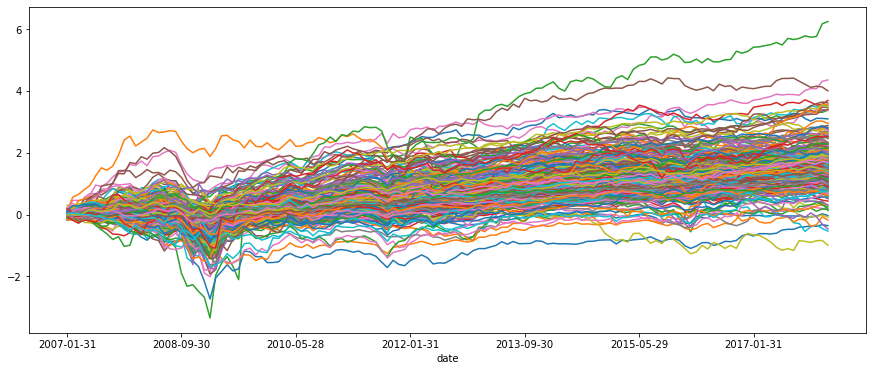

In [10]:
cum_ret.plot(legend=False) # legend=False to disable legend display due to the high number of stocks (300)

### Rearrange data with stocks in rows and returns in columns to treat returns as stock features

In [11]:
data_pivot = train.T
print(data_pivot.shape)
data_pivot.head()

(300, 134)


date,2007-01-31,2007-02-28,2007-03-30,2007-04-30,2007-05-31,2007-06-29,2007-07-31,2007-08-31,2007-09-28,2007-10-31,...,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-29,2017-10-31,2017-11-30,2017-12-29,2018-01-31,2018-02-28
TICKER,,,,,,,,,,,,,,,,,,,,,
A,-0.081779,-0.007813,0.061102,0.020184,0.110562,0.007074,-0.007544,-0.045872,0.013187,-0.000814,...,0.096094,-0.014882,0.008093,0.082455,-0.008035,0.061713,0.017786,-0.030633,0.096461,-0.065913
AAP,0.067210,-0.007905,0.025498,0.068742,0.005340,-0.020039,-0.142117,0.022721,-0.054556,0.016686,...,-0.059871,-0.127067,-0.039283,-0.125971,0.013892,-0.176008,0.235625,-0.012376,0.173538,-0.023421
AAPL,0.010490,-0.013064,0.098097,0.074158,0.214339,0.007005,0.079646,0.051002,0.108247,0.237701,...,0.067804,-0.057214,0.032704,0.106905,-0.060244,0.096808,0.020350,-0.015246,-0.010636,0.067610
ADBE,-0.054718,0.009776,0.062420,-0.003357,0.060156,-0.088745,0.003487,0.061057,0.021287,0.097114,...,0.060715,-0.002961,0.035704,0.059185,-0.038541,0.174152,0.036024,-0.034331,0.139922,0.046906
ADI,-0.003651,0.108702,-0.045167,0.119745,-0.057742,0.039492,-0.058183,0.045416,-0.019523,-0.074668,...,0.125459,-0.087570,0.015553,0.058980,0.035258,0.059534,-0.051917,0.033910,0.032012,-0.018829


### Compute clusters based on return behavior on the train period

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, n_init='auto', init='k-means++', random_state=0).fit(data_pivot)
clusters = pd.DataFrame(kmeans.cluster_centers_)
clusters

C:\Users\fabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,0.030475,0.006528,-0.004892,0.056792,0.018727,-0.038696,-0.083177,-0.005119,0.087097,0.015901,...,-0.008950,0.040382,0.055126,-0.058020,0.044654,0.022700,0.047158,-0.004941,0.029237,-0.089059
1,0.059774,-0.008138,-0.008134,0.043467,0.032033,-0.020550,-0.055763,0.021550,-0.002894,0.000452,...,-0.006381,0.018128,0.013540,-0.015358,0.058209,0.009211,0.062933,0.022219,0.042123,-0.048923
2,0.027996,0.001592,0.011001,0.032036,0.015555,-0.038619,-0.044490,0.037047,0.027248,0.030693,...,0.013225,-0.018246,0.015922,-0.003116,0.005025,-0.002752,0.047396,-0.006541,0.006265,-0.057200
3,0.022892,-0.007720,0.011207,0.055176,0.040238,-0.003492,-0.000635,0.022702,0.041031,0.044890,...,0.036520,0.006810,0.019788,0.017243,0.015038,0.032113,0.028469,-0.003063,0.080730,-0.023143
4,0.049146,0.035959,0.051674,0.061062,0.078599,0.017608,-0.014099,-0.013630,0.089711,0.082155,...,-0.036133,0.004994,0.029154,-0.053526,0.093416,0.010195,0.034887,0.053198,0.028781,-0.077924
5,0.030352,-0.007213,0.017054,0.033826,0.031014,-0.000644,-0.051411,0.008877,0.048451,0.014534,...,-0.000561,0.057388,0.005041,-0.014263,0.044927,0.001153,0.003696,0.014348,0.032300,-0.045879
6,0.044968,0.002317,-0.009665,0.017308,0.039680,-0.028657,-0.022378,-0.011476,0.022936,0.036415,...,-0.006531,0.064178,-0.001566,-0.007901,0.072616,-0.003839,0.059161,0.024003,0.066577,-0.030328
7,0.102954,-0.007991,-0.031448,0.006307,-0.020129,-0.119523,-0.067791,0.085299,0.064751,0.019310,...,-0.035540,0.040372,0.017889,-0.014351,0.008999,-0.024446,0.056756,-0.001657,-0.041988,-0.070188


### Transpose table so as to get centroid returns in colums and plot cumulated returns by cluster

In [13]:
clust_data = clusters.T
nb_clusters = clusters.shape[0] # retrieve number of clusters
New_labels=["Cluster " + str(x) for x in range(nb_clusters)] # Create cluster names
clust_data.columns = New_labels
clust_data.head()

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
0,0.030475,0.059774,0.027996,0.022892,0.049146,0.030352,0.044968,0.102954
1,0.006528,-0.008138,0.001592,-0.007720,0.035959,-0.007213,0.002317,-0.007991
2,-0.004892,-0.008134,0.011001,0.011207,0.051674,0.017054,-0.009665,-0.031448
3,0.056792,0.043467,0.032036,0.055176,0.061062,0.033826,0.017308,0.006307
4,0.018727,0.032033,0.015555,0.040238,0.078599,0.031014,0.039680,-0.020129


<AxesSubplot:xlabel='date'>

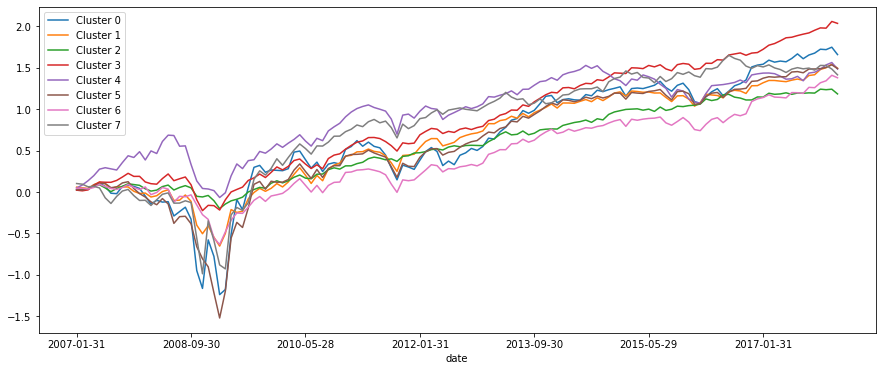

In [14]:
cum_ret = clust_data.cumsum() # compute cumulated returns
dates = data_pivot.columns # retrieve dates. Objective : create plot with dates on horizontal axis
cum_ret["date"] = dates # add date column in cum_ret
cum_ret = cum_ret.set_index(["date"]) # set "date" column as the index (will be considered as x values in plot)
cum_ret.plot()

### Retrieve the cluster a firm belongs to

In [15]:
clust = kmeans.predict(data_pivot)
clust

array([3, 2, 3, 3, 3, 2, 2, 3, 1, 2, 4, 5, 5, 7, 1, 1, 4, 4, 2, 1, 3, 3,
       3, 1, 2, 1, 3, 1, 4, 3, 3, 3, 2, 5, 2, 3, 5, 3, 1, 3, 3, 1, 3, 6,
       6, 3, 2, 3, 1, 1, 5, 2, 1, 2, 1, 3, 4, 2, 2, 3, 2, 2, 2, 6, 6, 4,
       2, 3, 2, 5, 4, 3, 2, 2, 3, 6, 3, 3, 4, 2, 2, 4, 3, 1, 4, 2, 2, 4,
       3, 2, 2, 2, 4, 1, 2, 3, 2, 1, 1, 2, 4, 3, 2, 2, 4, 3, 2, 6, 5, 5,
       1, 6, 2, 4, 3, 3, 5, 3, 2, 4, 2, 4, 3, 3, 2, 3, 2, 3, 1, 3, 6, 5,
       1, 4, 3, 5, 5, 2, 1, 0, 1, 4, 3, 3, 2, 3, 6, 3, 3, 3, 3, 3, 5, 1,
       1, 3, 6, 2, 6, 1, 2, 6, 7, 1, 2, 1, 2, 2, 6, 2, 2, 3, 0, 1, 3, 3,
       2, 7, 1, 1, 2, 3, 3, 1, 2, 4, 2, 3, 6, 3, 3, 2, 3, 2, 3, 3, 4, 4,
       6, 3, 4, 3, 5, 2, 4, 1, 3, 2, 4, 2, 2, 3, 1, 2, 3, 2, 2, 2, 0, 2,
       2, 1, 1, 3, 7, 6, 2, 2, 2, 0, 1, 3, 4, 3, 1, 3, 6, 1, 4, 3, 3, 2,
       3, 6, 7, 1, 2, 7, 2, 2, 6, 1, 1, 3, 4, 3, 2, 2, 3, 1, 1, 3, 3, 1,
       6, 3, 3, 5, 2, 4, 3, 1, 3, 6, 1, 1, 6, 3, 3, 4, 1, 1, 3, 3, 7, 2,
       3, 3, 2, 6, 1, 4, 2, 5, 4, 2, 3, 3, 3, 6])

### Count the number of firms in each cluster

In [16]:
data_temp = data_pivot.copy() # we want to leave data_pivot untouched
data_temp["cluster"] = clust
data_temp.groupby("cluster")["cluster"].count()

cluster
0     4
1    50
2    77
3    90
4    32
5    16
6    24
7     7
Name: cluster, dtype: int64

### Do clusters match activity sector of firms?

In [17]:
data_temp2 = pd.DataFrame(data_temp["cluster"]).reset_index() # keep cluster values only
match_sector = data_temp2.merge(sectors)
match_sector.groupby("cluster")["sector_1dgt"].agg(["count", "mean", "min", "max", "std"])

,count,mean,min,max,std
cluster,,,,,
0,4,6.000000,6,6,0.000000
1,50,4.640000,1,7,1.781538
2,77,4.103896,1,8,1.690410
3,90,4.044444,1,8,1.804558
4,32,2.875000,1,8,2.012060
5,16,4.875000,2,7,1.586401
6,24,5.375000,4,6,0.923721
7,7,6.000000,6,6,0.000000


### Returns of equally-weighted portfolio from each cluster

<AxesSubplot:xlabel='date'>

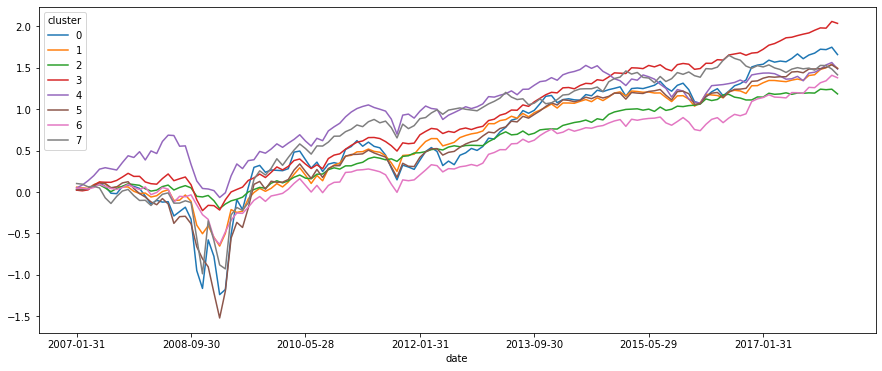

In [18]:
PF = data_temp.groupby("cluster").mean().T
PF_cumret = PF.cumsum()
PF_cumret.plot()

### How many clusters?

In [19]:
error = []
for i in np.arange(1, 50):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=0).fit(data_pivot)
    error.append(kmeans.inertia_)
errors = pd.DataFrame(error)

C:\Users\fabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\fabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\fabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\fabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

C:\Users\fabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\fabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\fabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\fabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

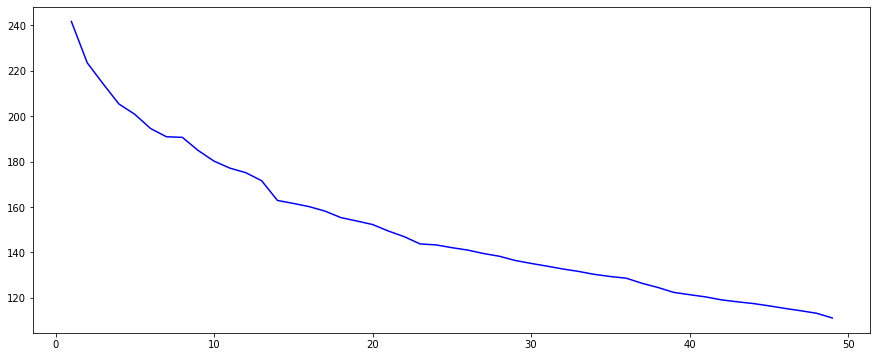

In [20]:
plt.plot(np.arange(1, 50), error, "b-")

Elbow rule: To determine the optimal number of clusters, we have to select the value of k at the “elbow” i.e. the point after which the inertia starts decreasing in a linear fashion. No clear k here... 10 seems to be a reasonable choice however.

In [21]:
kmeans_optim = KMeans(n_clusters=10, random_state=0).fit(data_pivot)
clusters = pd.DataFrame(kmeans_optim.cluster_centers_)

clust_data = clusters.T
nb_clusters = clusters.shape[0] # retrieve number of clusters
New_labels=["Cluster " + str(x) for x in range(nb_clusters)] # Build cluster names
clust_data.columns = New_labels
clust_data.head()

C:\Users\fabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9
0,0.063200,0.016244,0.069607,0.068972,-0.012223,-0.044795,0.037456,0.009992,0.046974,0.067301
1,0.001482,0.011776,0.024461,0.340145,-0.030141,-0.017166,0.003132,-0.025652,-0.003837,-0.014744
2,0.008978,0.025417,-0.018146,0.044775,0.008376,0.001639,0.032910,-0.013100,-0.003163,-0.005136
3,0.056769,0.037702,-0.002002,0.096510,0.106183,0.040018,0.058887,0.020394,0.036417,0.011150
4,0.032510,0.010779,0.004938,0.150842,0.043908,0.037119,0.055683,0.025078,0.038279,0.016933


<AxesSubplot:xlabel='date'>

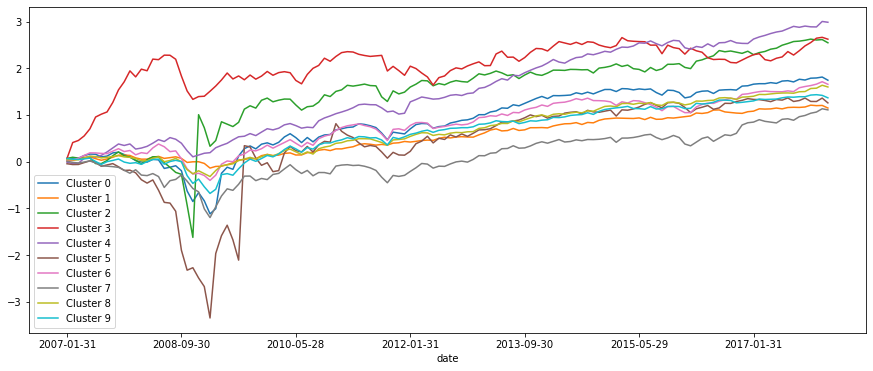

In [22]:
cum_ret = clust_data.cumsum() # compute cumulated returns
dates = data_pivot.columns # retrieve dates. Objective : create plot with dates on horizontal axis
cum_ret["date"] = dates # create date column in cum_ret
cum_ret = cum_ret.set_index(["date"]) # set "date" column as the index (will be considered as x values in plots)
cum_ret.plot()

### Number of stocks in each cluster

In [23]:
data_temp = data_pivot.copy() # we want to leave data_pivot untouched
data_temp["cluster"] = kmeans_optim.predict(data_pivot)
nb_stocks = data_temp.groupby("cluster")["cluster"].count()
nb_stocks

cluster
0     18
1     55
2      1
3      3
4     16
5      1
6     55
7     18
8    102
9     31
Name: cluster, dtype: int64

### Select the most representative stock within each cluster, i.e. the one closest to the cluster centroid

In [24]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans_optim.cluster_centers_, data_pivot)
closest

array([152, 157, 224, 185, 262,  12,  87,  63, 126,  49], dtype=int64)

In [25]:
best_fits = data_pivot.iloc[closest,:]
cum_best_fits = best_fits.T.cumsum()
cum_best_fits.head()
cum_best_fits.round(decimals=3).head()

TICKER,IP,JNJ,PLD,MOS,TMO,AIG,DOV,CMA,GPC,BXP
date,,,,,,,,,,
2007-01-31,-0.012,0.012,0.070,-0.067,0.057,-0.045,0.012,0.011,0.002,0.127
2007-02-28,0.063,-0.041,0.094,0.210,0.002,-0.062,-0.021,0.029,0.027,0.079
2007-03-30,0.075,-0.083,0.076,0.258,0.035,-0.060,0.000,0.019,0.040,0.063
2007-04-30,0.111,-0.017,0.074,0.364,0.149,-0.020,-0.014,0.066,0.049,0.064
2007-05-31,0.156,-0.026,0.079,0.555,0.198,0.017,0.030,0.081,0.087,0.048


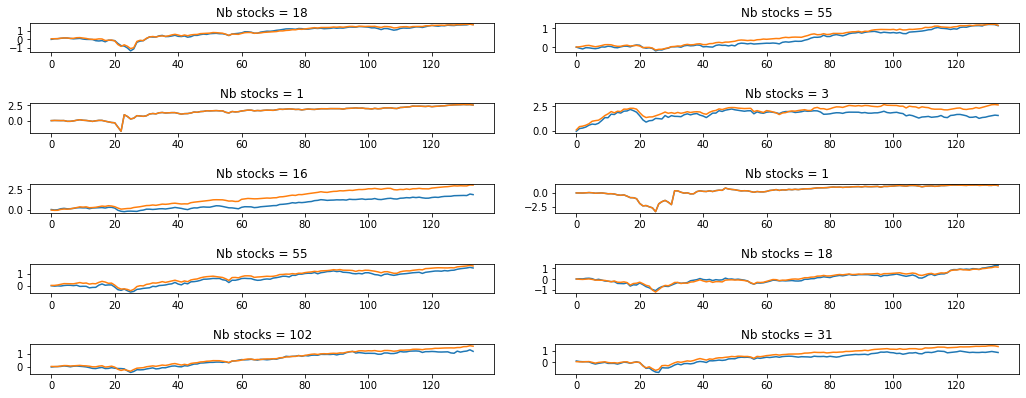

In [26]:
fig, axs = plt.subplots(5, 2)
fig.tight_layout(pad=3.0)
cum_best_fits_cols = cum_best_fits.columns
cum_ret_cols = cum_ret.columns
for i in range(len(cum_best_fits_cols)):
    row = int(i/2)
    j = i%2
    cur_col_best_fits = cum_best_fits_cols[i]
    cur_col_cum_ret = cum_ret_cols[i]
    s = pd.concat([cum_best_fits[cur_col_best_fits],
                   cum_ret[cur_col_cum_ret]], axis=1).reset_index(drop=True) # reset_index + drop otherwise dates
                                                                             # are reported on x axis and are unreadable
    axs[row,j].plot(s)
    axs[row,j].title.set_text("Nb stocks = {}".format(nb_stocks[i]))

### Can we replicate the whole portfolio (300 stocks) with the 10 representative stocks only?

### Performance on train set

#### Correlation bewteen whole portfolio returns and 10-stock portfolio returns

In [27]:
ret_PF_all = train.mean(axis=1)
ret_PF_repr_stocks = best_fits.T.mean(axis=1)
ret_PF_all.corr(ret_PF_repr_stocks)

0.890492070142544

#### Plot of returns

<AxesSubplot:xlabel='date'>

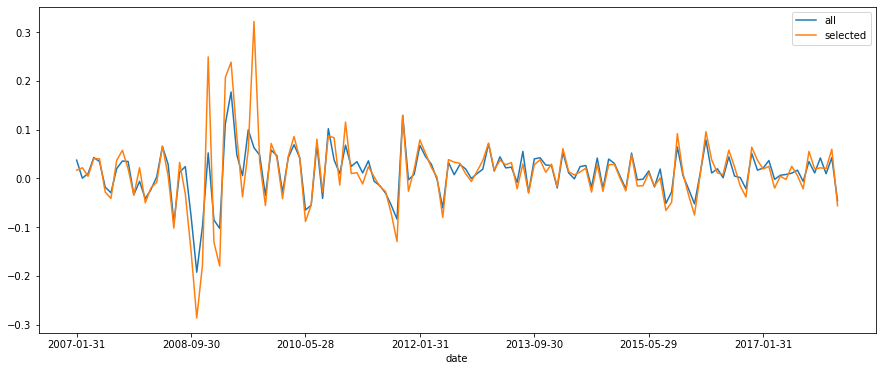

In [28]:
ret_all_train = pd.DataFrame(ret_PF_all)
ret_repr_train = pd.DataFrame(ret_PF_repr_stocks)
ret_train = pd.concat([ret_all_train, ret_repr_train], axis=1)
ret_train.columns = ['all', 'selected']
ret_train.plot()

### Performance on test set

#### Returns

In [29]:
ret_PF_all = test.mean(axis=1)
best_fits = test.iloc[:, closest].T
ret_PF_repr_stocks = best_fits.T.mean(axis=1)
ret_PF_all.corr(ret_PF_repr_stocks)

0.9656267109058112

#### Plot of returns

<AxesSubplot:xlabel='date'>

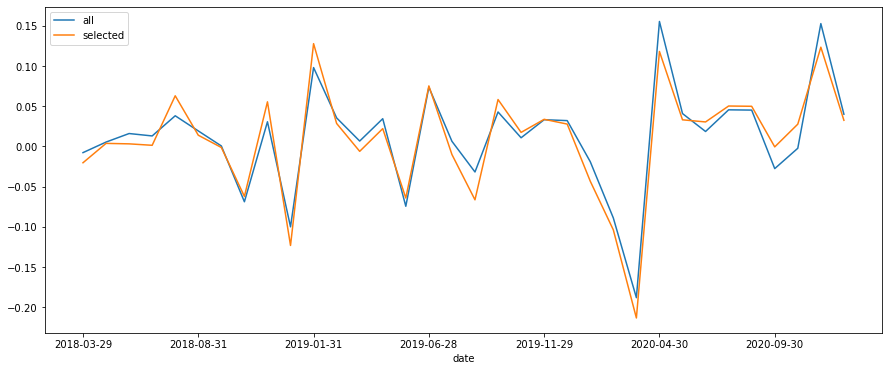

In [30]:
ret_all_test = pd.DataFrame(ret_PF_all)
ret_repr_test = pd.DataFrame(ret_PF_repr_stocks)
ret_test = pd.concat([ret_all_test, ret_repr_test], axis=1)
ret_test.columns = ['all', 'selected']
ret_test.plot()